In [2]:
import pandas as pd
import json
import numpy as np
import glob

In [132]:
pd.options.display.max_rows=20000

In [3]:
files = glob.glob("./*.json")

In [5]:
files

['./david-24_05_2024_11_54_31.json',
 './marc-24_05_2024_12_01_43.json',
 './paula-24_05_2024_16_30_39.json',
 './maria-24_05_2024_11_47_38.json',
 './fer-24_05_2024_16_33_54.json']

In [6]:
j = json.load(open(files[0]))

In [11]:
j[0].keys()

dict_keys(['inputs', 'outputs', 'name'])

In [62]:
J={}
for f in files:
    j = json.load(open(f))
    for n in j:
        phon = n['name']
        if phon in J:
            J[phon]['inputs']=J[phon]['inputs']+n['inputs']
            if J[phon]['outputs']!= n['outputs']:
                print(f,phon)
                print("new:",J[phon]['outputs'])
                print("old:",n['outputs'])
        else:
            J[phon]=n
            

./marc-24_05_2024_12_01_43.json ch
new: {'tongue.index': 21.067941665649414, 'tongue.diameter': 2.72188401222229, 'frontConstriction.index': 31.482295989990234, 'frontConstriction.diameter': 0.4663625657558441, 'backConstriction.index': 22.110883712768555, 'backConstriction.diameter': 3.4028234663852886e+38, 'voiceness': 0}
old: {'tongue.index': 12.213376998901367, 'tongue.diameter': 2.8788487911224365, 'frontConstriction.index': 35.88129806518555, 'frontConstriction.diameter': -1.2149009704589844, 'backConstriction.index': 22.009140014648438, 'backConstriction.diameter': 3.4028234663852886e+38, 'voiceness': 0.8}
./paula-24_05_2024_16_30_39.json ch
new: {'tongue.index': 21.067941665649414, 'tongue.diameter': 2.72188401222229, 'frontConstriction.index': 31.482295989990234, 'frontConstriction.diameter': 0.4663625657558441, 'backConstriction.index': 22.110883712768555, 'backConstriction.diameter': 3.4028234663852886e+38, 'voiceness': 0}
old: {'tongue.index': 12.213376998901367, 'tongue.di

In [63]:
Jlist = list(J.values())

In [27]:
json.dump(Jlist,open("../all_people.json","w"))

In [44]:
from sklearn.model_selection import train_test_split

In [65]:
Jtrain = []
Jval = []
for item in Jlist:
    tph = item.copy()
    vph = item.copy()
    tph['inputs'], vph['inputs'] = train_test_split(item['inputs'], test_size=0.1)
    Jtrain.append(tph)
    Jval.append(vph)

In [70]:
json.dump(Jtrain,open("../all_people_TRAIN.json","w"))
json.dump(Jval,open("../all_people_VAL.json","w"))

# Validation

In [157]:
val = json.load(open("../validation.json"))

In [158]:
dfval = pd.DataFrame(val)
dfval = dfval.rename(columns={"k":"knn"})

In [159]:
dfpred = dfval.copy()
dfpred.prediction = dfval.prediction.apply( lambda y: max(y, key=y.get))
dfpred['ok']=(dfpred.prediction==dfpred.phoneme)

<AxesSubplot:xlabel='knn', ylabel='ok'>

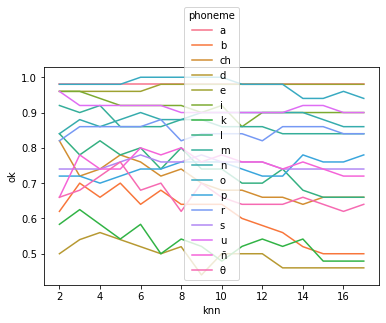

In [167]:
accuracy = dfpred.groupby(["knn","phoneme"]).ok.mean().reset_index()
sns.lineplot(x='knn', y='ok', hue='phoneme',data=accuracy)

In [136]:
letras = dfval.prediction.apply(pd.Series)
L = sorted(letras.columns)
letras = letras[L]

In [137]:
dfval = pd.concat([dfval[["phoneme","k"]].rename(columns={"k": "knn"}),
           letras],axis=1)

In [138]:
dfvalMean = dfval.groupby(["knn","phoneme"]).mean().reset_index()

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
def get_matrix(k):
    return dfvalMean.loc[dfvalMean["knn"]==k].drop(columns="knn").set_index("phoneme")

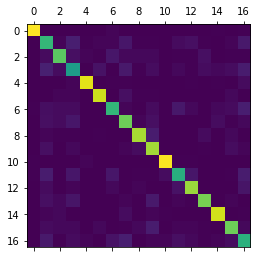

In [147]:
plt.matshow(get_matrix(3))

In [144]:
get_matrix(17)

,a,b,ch,d,e,i,k,l,m,n,o,p,r,s,u,ñ,θ
phoneme,,,,,,,,,,,,,,,,,
a,0.972941,0.000000,0.001176,0.000000,0.000000,0.000000,0.004706,0.002353,0.000000,0.000000,0.000000,0.001176,0.001176,0.000000,0.010588,0.000000,0.005882
b,0.000000,0.403529,0.024706,0.125882,0.025882,0.012941,0.022353,0.074118,0.025882,0.031765,0.014118,0.041176,0.040000,0.016471,0.008235,0.011765,0.121176
ch,0.000000,0.024706,0.578824,0.067059,0.014118,0.034118,0.050588,0.041176,0.030588,0.014118,0.000000,0.011765,0.012941,0.043529,0.001176,0.045882,0.029412
d,0.000000,0.120000,0.057647,0.348235,0.011765,0.051765,0.011765,0.096471,0.024706,0.049412,0.003529,0.030588,0.009412,0.034118,0.029412,0.057647,0.063529
e,0.009412,0.022353,0.010588,0.055294,0.797647,0.000000,0.010588,0.016471,0.000000,0.000000,0.015294,0.000000,0.007059,0.001176,0.010588,0.010588,0.032941
i,0.000000,0.003529,0.040000,0.029412,0.001176,0.731765,0.003529,0.083529,0.031765,0.012941,0.000000,0.000000,0.004706,0.004706,0.000000,0.052941,0.000000
k,0.025735,0.036765,0.040441,0.026961,0.011029,0.004902,0.452206,0.034314,0.006127,0.026961,0.000000,0.110294,0.056373,0.004902,0.028186,0.031863,0.102941
l,0.000000,0.065882,0.032941,0.063529,0.010588,0.047059,0.021176,0.521176,0.054118,0.038824,0.001176,0.010588,0.007059,0.004706,0.063529,0.025882,0.031765
m,0.000000,0.027059,0.021176,0.011765,0.000000,0.021176,0.002353,0.011765,0.688235,0.118824,0.000000,0.001176,0.000000,0.023529,0.001176,0.067059,0.004706


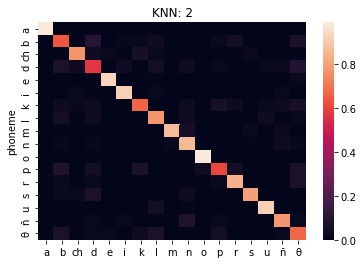

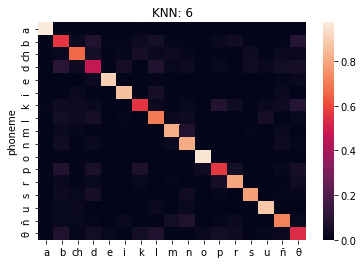

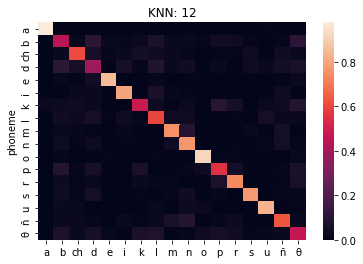

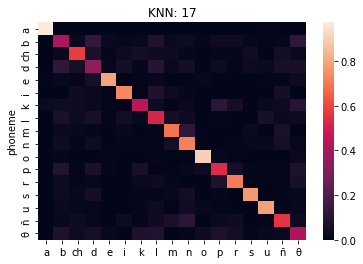

In [145]:
for k in [2,6,12,17]:
    df = get_matrix(k)
    plt.figure()
    sns.heatmap(df).set_title(f"KNN: {k}")
    plt.plot()